### DataAnalyses

things that we need to add: 
From lecture 10 : 
- Common classification metrics include accuracy, precision, recall, and F1 score
- maybe make some confusion matrix 
- ROC-AUC Curve, it is done after the prediction 
- Precision-Recall curve 
- Probability density
- Cross-Validation : Technique used for assessing the performance and generalization of a predictive model.
From lecture 11 : 
- make different graphs for the KNN as in the screenshot 
Fromt lecture 12 : 
- Popular method: Classification and Regression Trees (CART), Breiman, Friedman, Olshen and Stone (1984). 
- we can add gradient boosting classifier 




some insights : 
- correlation of different features to the results 
- clarify why we have such results fr the graph 
- how each feature effect to the technique , very important to make general assumption 
- he asked about relatioships with feauture , with correlation 
- regression should not be too perfect 
- how is models misstrained 
- grid 
- retraining the model 
- confusion matrix for the prediction 
- the most impact while predictiong something 




## Libraries


In [328]:
# basics
import numpy as np
import pandas as pd 

# for plots
import matplotlib.pyplot as plt
import seaborn as sns

# data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, mean_absolute_error

In [329]:
# Dataset
df = pd.read_csv("DataSet/googleplaystore.csv")
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [330]:
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [331]:
sns.set_style('darkgrid')

PALETTE = "Set3"
sns.set_palette(PALETTE)
sns.color_palette(PALETTE)

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [332]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Data cleaning 

In [334]:

# Drop rows with any missing values
df = df.dropna()


df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)

df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)


df['Size'] = df['Size'].astype(str).str.replace('M', '').str.replace('k', '')  
df['Size'] = df['Size'].replace('Varies with device', np.nan)  
df['Size'] = df['Size'].str.strip() 


df['Size'] = pd.to_numeric(df['Size'], errors='coerce') 
df['Size'].fillna(df['Size'].median(), inplace=True)


df['Android Ver'] = df['Android Ver'].astype(str).str.replace(' and up', '', regex=False).str.strip()


df['Current Ver'] = df['Current Ver'].astype(str).str.strip()
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Reviews'] = df['Reviews'].astype(str).str.replace(r'[^\d]', '', regex=True).str.strip()
df['Genres'] = df['Genres'].astype(str).str.strip()
df['Content Rating'] = df['Content Rating'].astype(str).str.strip()
df['Type'] = df['Type'].astype(str).str.strip()
df['Category'] = df['Category'].astype(str).str.strip()



df = df.reset_index(drop=True)


df.head()



/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_2895/587955878.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size'].fillna(df['Size'].median(), inplace=True)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9360 non-null   object        
 1   Category        9360 non-null   object        
 2   Rating          9360 non-null   float64       
 3   Reviews         9360 non-null   object        
 4   Size            9360 non-null   float64       
 5   Installs        9360 non-null   object        
 6   Type            9360 non-null   object        
 7   Price           9360 non-null   object        
 8   Content Rating  9360 non-null   object        
 9   Genres          9360 non-null   object        
 10  Last Updated    9360 non-null   datetime64[ns]
 11  Current Ver     9360 non-null   object        
 12  Android Ver     9360 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 950.8+ KB


### Data analyses 

### Data encoding  FINAL

In [336]:

price_before = df['Price'].copy()

price_converted = pd.to_numeric(price_before, errors='coerce')

num_invalid = price_converted.isna().sum()
total = len(price_before)

print(f"Некорректных значений: {num_invalid} из {total} ({num_invalid / total * 100:.2f}%)")



df = df.dropna(subset=['Rating', 'Installs', 'Type', 'Content Rating'])


df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') 
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())

df['Size'] = df['Size'].replace('Varies with device', np.nan) 


df['Price'] = df['Price'].fillna('0') 

def parse_size(size):
    if isinstance(size, str):
        size = size.strip()
        if size.endswith('M'):
            return float(size[:-1])
        elif size.endswith('k'):
            return float(size[:-1]) / 1024
    return np.nan


df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

df['Price'] = df['Price'].str.replace('$', '', regex=True) #нафиг знак доллара
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)




price_before = df['Price'].copy()

price_converted = pd.to_numeric(price_before, errors='coerce')

num_invalid = price_converted.isna().sum()
total = len(price_before)
le = LabelEncoder()
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
latest_date = df['Last Updated'].max()
df['Days Since Update'] = (latest_date - df['Last Updated']).dt.days

df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)


df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')


df = df.dropna(subset=['Installs'])

df['Installs'] = df['Installs'].astype(int)
df.info()


def get_success_level(installs):
    if installs <= 10000:
        return 'Not Successful'
    elif installs <= 100000:
        return 'Average'
    elif installs <= 1000000:
        return 'Above Average'
    else:
        return 'Successful'

df['Success_Level'] = df['Installs'].apply(get_success_level)

le = LabelEncoder()
df['Success_Level_Encoded'] = le.fit_transform(df['Success_Level'])

df["Success_Level_Encoded"].value_counts
df.head()

Некорректных значений: 0 из 9360 (0.00%)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9360 non-null   object        
 1   Category           9360 non-null   object        
 2   Rating             9360 non-null   float64       
 3   Reviews            9360 non-null   int64         
 4   Size               9360 non-null   float64       
 5   Installs           9360 non-null   int64         
 6   Type               9360 non-null   object        
 7   Price              9360 non-null   float64       
 8   Content Rating     9360 non-null   object        
 9   Genres             9360 non-null   object        
 10  Last Updated       9360 non-null   datetime64[ns]
 11  Current Ver        9360 non-null   object        
 12  Android Ver        9360 non-null   object        
 13  Days Since Update  936

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Days Since Update,Success_Level,Success_Level_Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,213,Not Successful,2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,205,Above Average,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,7,Successful,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,61,Successful,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,49,Average,1


In [337]:
df_tree = df.copy()
from sklearn.preprocessing import LabelEncoder

label_cols = ['Category', 'Type', 'Content Rating', 'Android Ver', 'Genres']
le = LabelEncoder()

for col in label_cols:
    df_tree[col] = le.fit_transform(df_tree[col].astype(str))
df_tree.head()
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   App                    9360 non-null   object        
 1   Category               9360 non-null   int64         
 2   Rating                 9360 non-null   float64       
 3   Reviews                9360 non-null   int64         
 4   Size                   9360 non-null   float64       
 5   Installs               9360 non-null   int64         
 6   Type                   9360 non-null   int64         
 7   Price                  9360 non-null   float64       
 8   Content Rating         9360 non-null   int64         
 9   Genres                 9360 non-null   int64         
 10  Last Updated           9360 non-null   datetime64[ns]
 11  Current Ver            9360 non-null   object        
 12  Android Ver            9360 non-null   int64         
 13  Day

In [338]:
df_linear = df.copy()
df_linear = pd.get_dummies(df_linear, columns=['Category', 'Type', 'Content Rating', 'Android Ver', 'Genres'], drop_first=True)
df_linear.head()



,App,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Days Since Update,Success_Level,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0,2018-01-07,1.0.0,213,Not Successful,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,3.9,967,14.0,500000,0.0,2018-01-15,2.0.0,205,Above Average,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,0.0,2018-08-01,1.2.4,7,Successful,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0,2018-06-08,Varies with device,61,Successful,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0,2018-06-20,1.1,49,Average,...,False,False,False,False,False,False,False,False,False,False


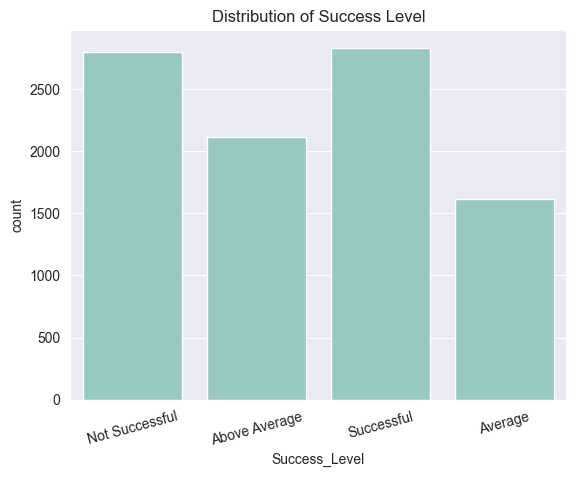

Success_Level_Encoded
3    2832
2    2799
0    2113
1    1616
Name: count, dtype: int64

In [339]:
sns.countplot(data=df, x='Success_Level')
plt.title('Distribution of Success Level')
plt.xticks(rotation=15)
plt.show()

df['Success_Level'].value_counts()
df['Success_Level_Encoded'].value_counts()

In [340]:
print(df[['Success_Level', 'Success_Level_Encoded']].head())
print(df['Success_Level'].value_counts())
print(df['Success_Level_Encoded'].value_counts())


    Success_Level  Success_Level_Encoded
0  Not Successful                      2
1   Above Average                      0
2      Successful                      3
3      Successful                      3
4         Average                      1
Success_Level
Successful        2832
Not Successful    2799
Above Average     2113
Average           1616
Name: count, dtype: int64
Success_Level_Encoded
3    2832
2    2799
0    2113
1    1616
Name: count, dtype: int64


# Data analyses 

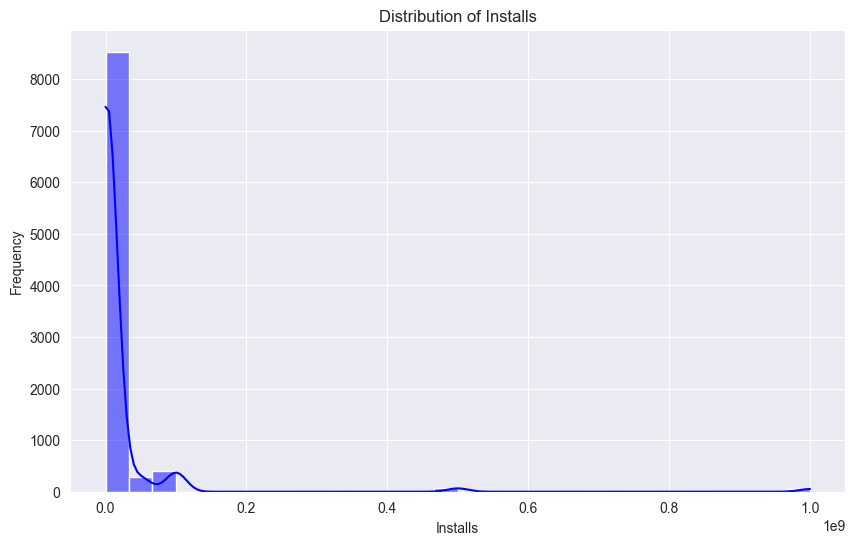

In [341]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Installs'], kde=True, color='blue', bins=30)
plt.title('Distribution of Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()


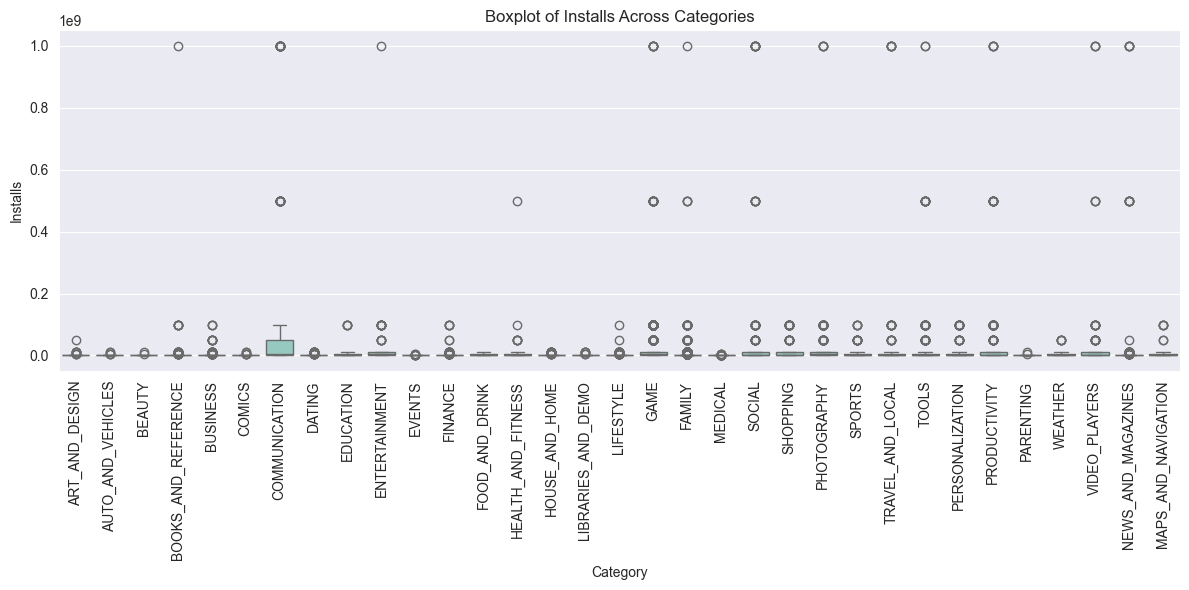

In [342]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Installs')
plt.xticks(rotation=90)
plt.title('Boxplot of Installs Across Categories')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.tight_layout()
plt.show()


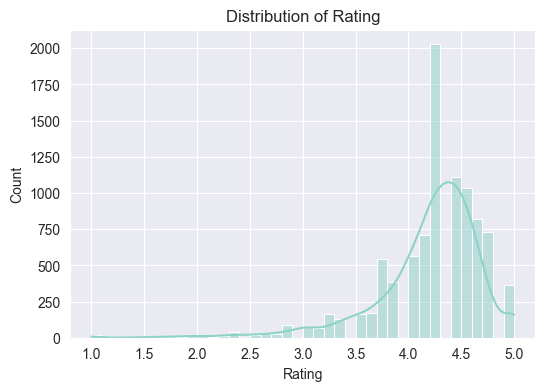

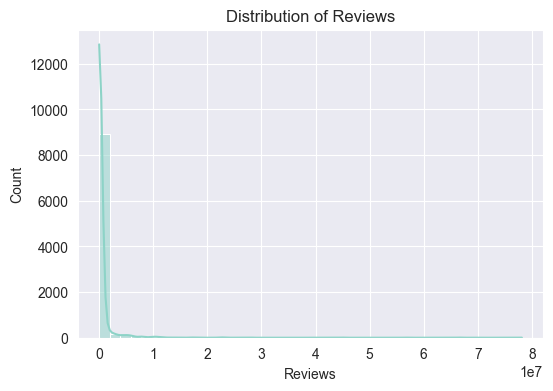

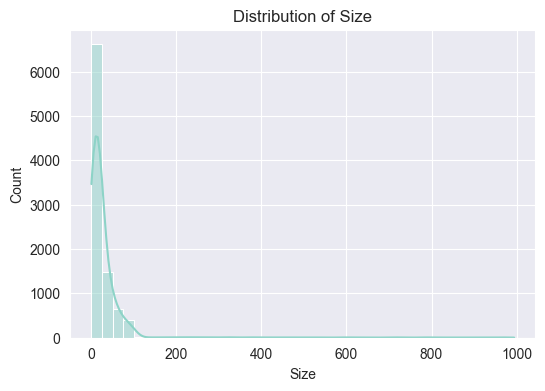

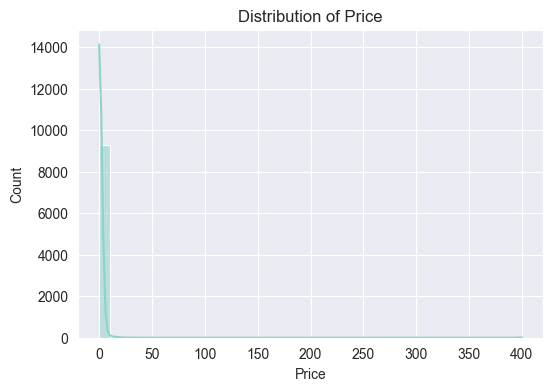

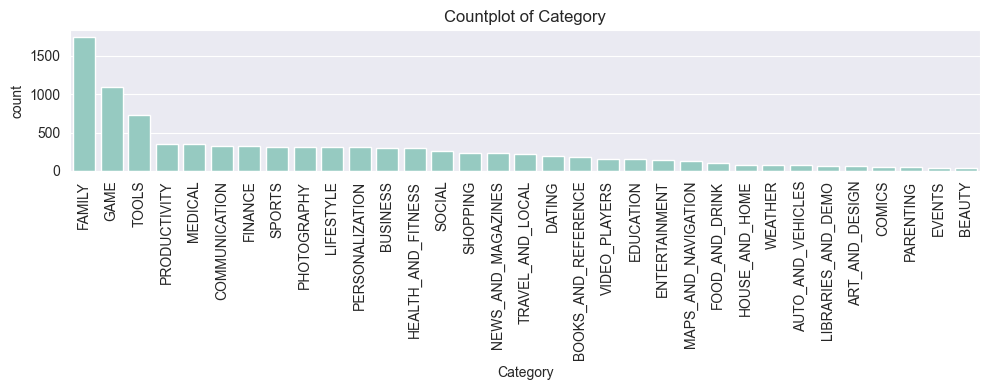

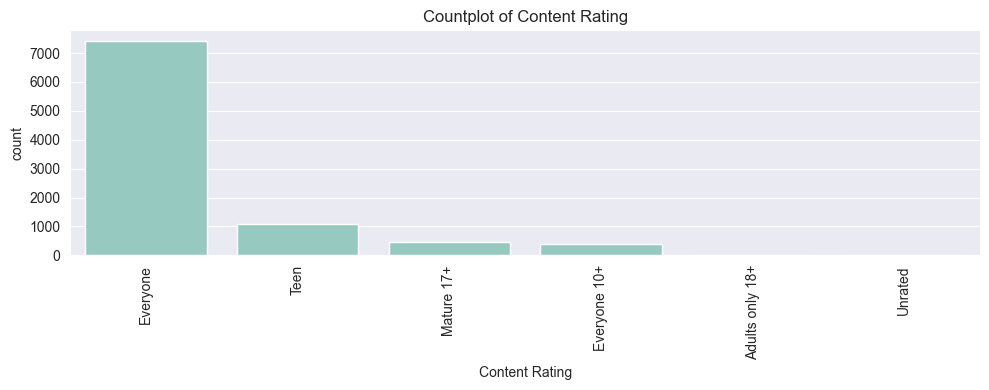

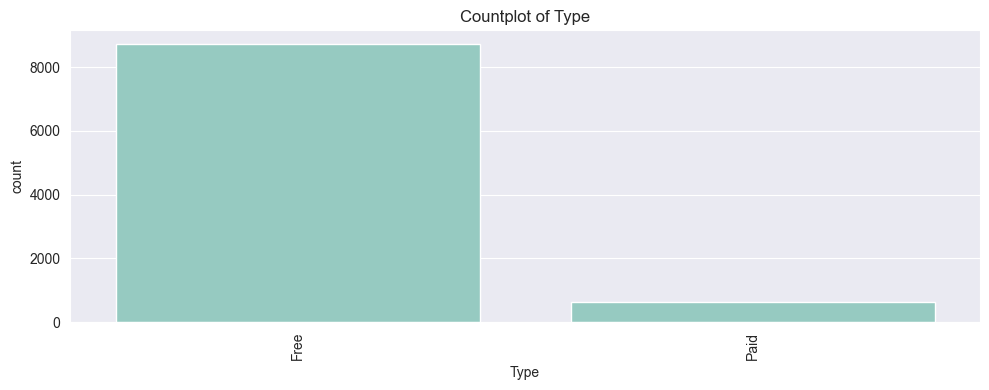

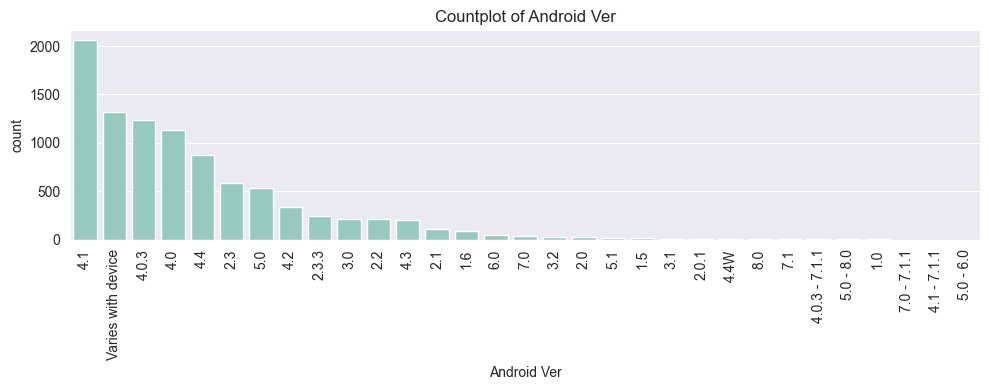

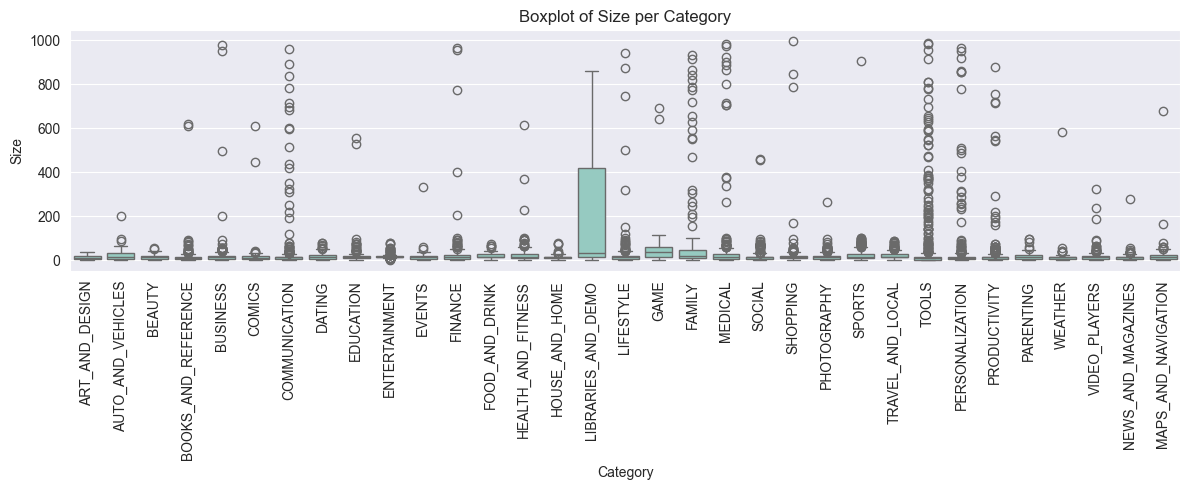

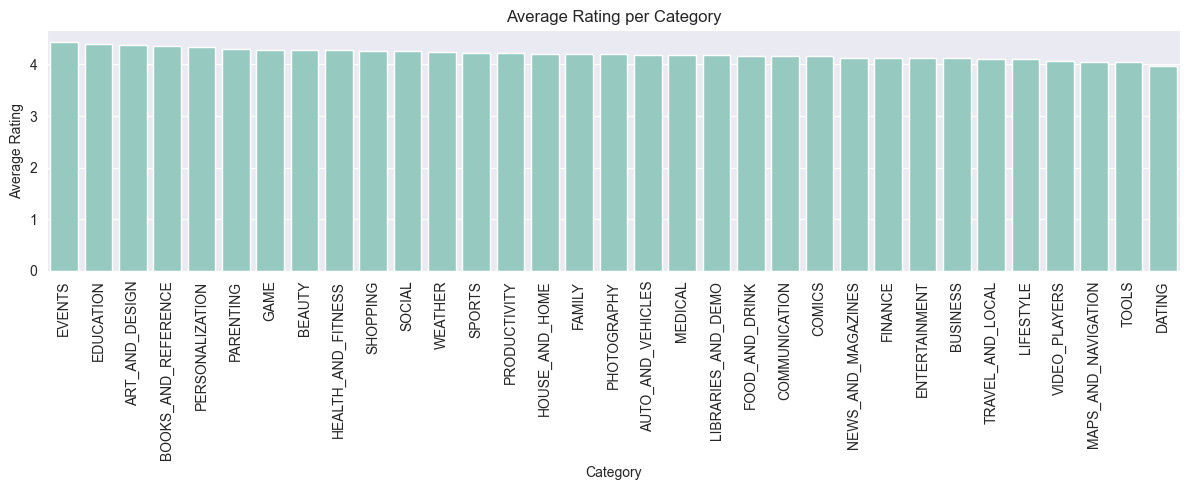

In [343]:


# Histogram: Numerical Features
num_features = ['Rating', 'Reviews', 'Size', 'Price']
df[num_features] = df[num_features].apply(pd.to_numeric, errors='coerce')

for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Countplots: Categorical Features
cat_features = ['Category', 'Content Rating', 'Type', 'Android Ver']
for col in cat_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
    plt.show()

# Boxplot of Size across Category
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Category', y='Size')
plt.xticks(rotation=90)
plt.title('Boxplot of Size per Category')
plt.tight_layout()
plt.show()

# Barplot: Average Rating per Category
plt.figure(figsize=(12, 5))
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating.index, y=avg_rating.values)
plt.xticks(rotation=90)
plt.ylabel("Average Rating")
plt.title("Average Rating per Category")
plt.tight_layout()
plt.show()

In [344]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Days Since Update', 'Success_Level',
       'Success_Level_Encoded'],
      dtype='object')

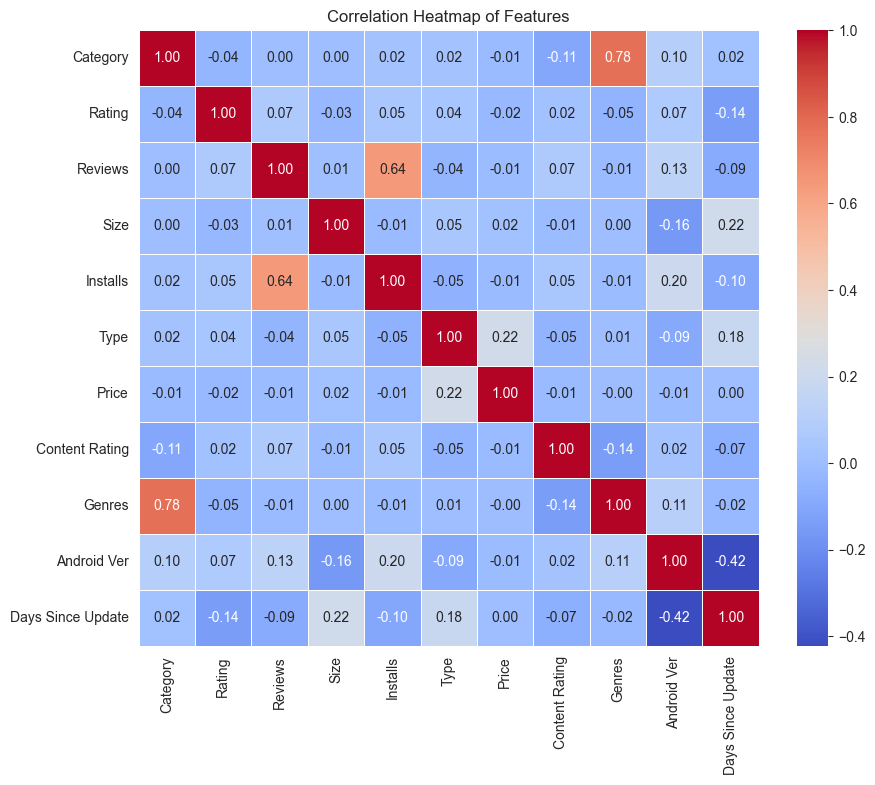

In [345]:

numeric_df = df_tree
numeric_df = numeric_df.drop(['Success_Level_Encoded', 'Success_Level','App','Last Updated','Current Ver'], axis=1)


corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Features')


plt.show()

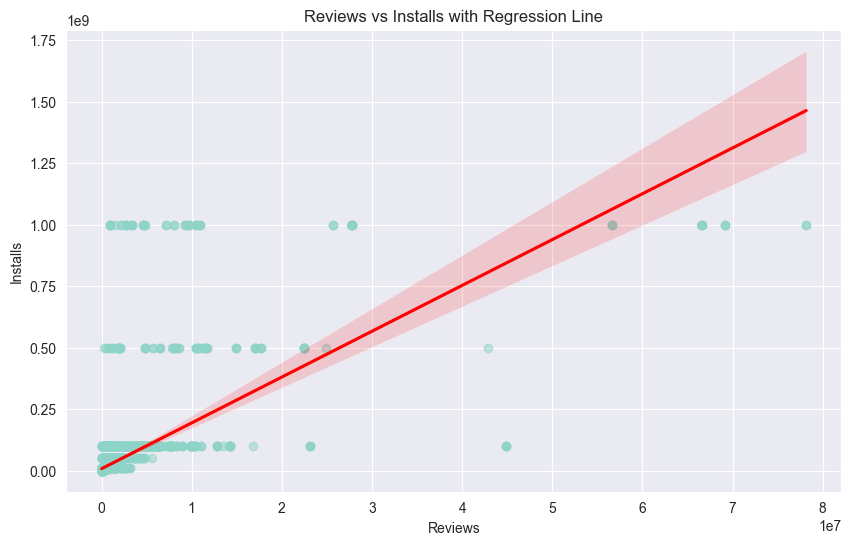

In [346]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Reviews', y='Installs', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Reviews vs Installs with Regression Line')
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.show()


- Shows a **scatter plot** of user Reviews (x-axis) vs Installs (y-axis).
- A **red regression line** is fitted to visualize the trend.
- The **positive slope** of the line indicates:
- The heatmap showed a **correlation of ~0.63**, which is:
- A **moderate to strong positive relationship**.
- Suggests that **Reviews** can be a **predictive feature** for Installs in modeling app success.

In [347]:
print(df['App'].duplicated().sum())
df_for_top_ten = df.sort_values(by='Reviews', ascending=False).drop_duplicates(subset='App', keep='first')
df.info()
df_for_top_ten.info()


1170
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   App                    9360 non-null   object        
 1   Category               9360 non-null   object        
 2   Rating                 9360 non-null   float64       
 3   Reviews                9360 non-null   int64         
 4   Size                   9360 non-null   float64       
 5   Installs               9360 non-null   int64         
 6   Type                   9360 non-null   object        
 7   Price                  9360 non-null   float64       
 8   Content Rating         9360 non-null   object        
 9   Genres                 9360 non-null   object        
 10  Last Updated           9360 non-null   datetime64[ns]
 11  Current Ver            9360 non-null   object        
 12  Android Ver            9360 non-null   object        
 13

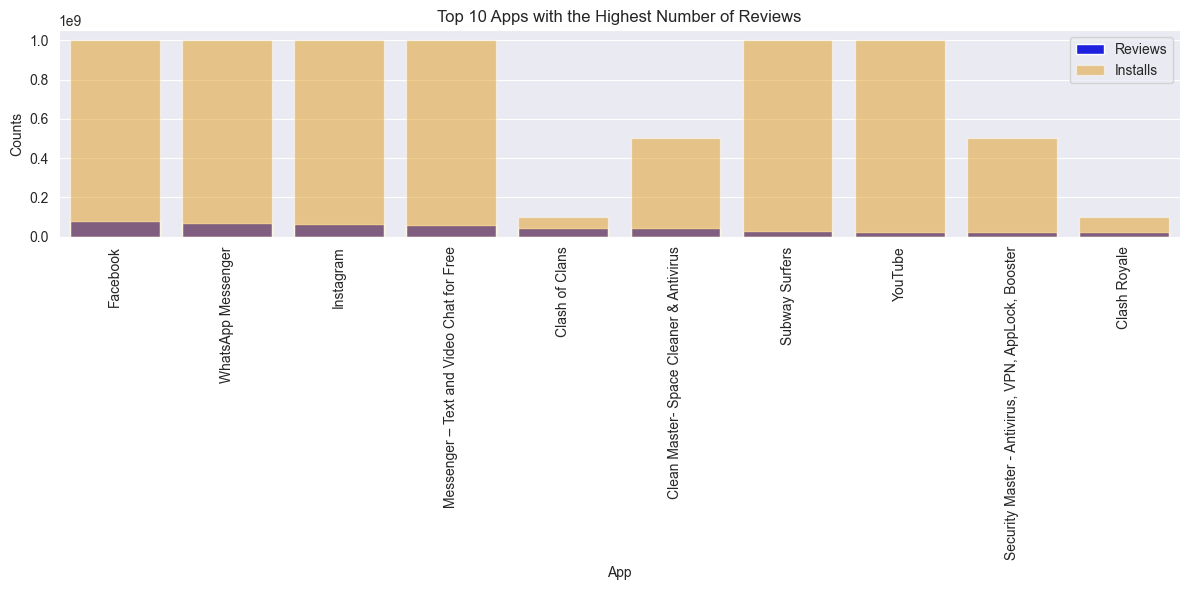

In [348]:
top_reviews = df_for_top_ten[['App', 'Reviews', 'Installs']].sort_values(by='Reviews', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_reviews, x='App', y='Reviews', color='blue', label='Reviews')
sns.barplot(data=top_reviews, x='App', y='Installs', color='orange', label='Installs', alpha=0.5)
plt.title('Top 10 Apps with the Highest Number of Reviews')
plt.xlabel('App')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


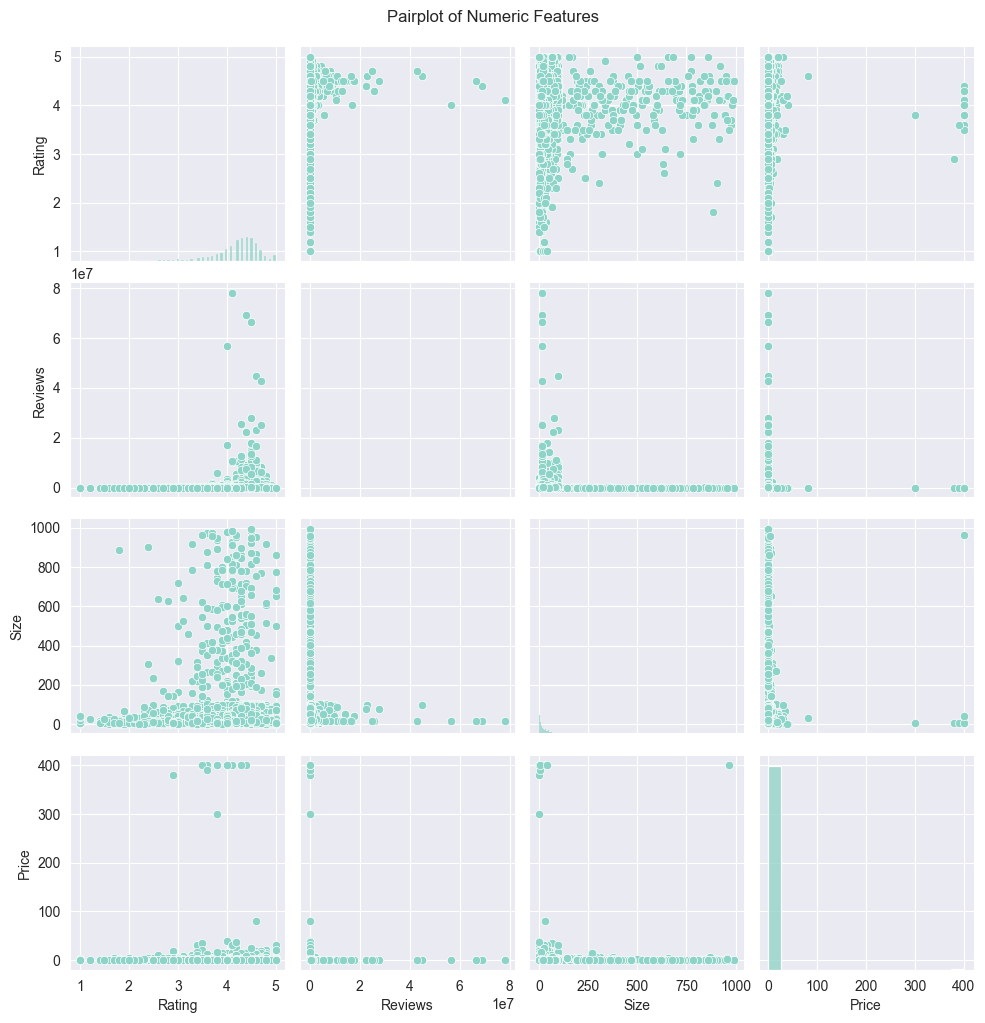

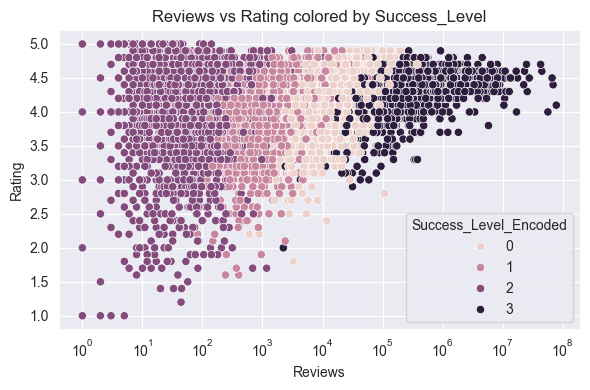

In [349]:



sns.pairplot(df[num_features])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Reviews', y='Rating', hue='Success_Level_Encoded')
plt.title("Reviews vs Rating colored by Success_Level")
plt.xscale('log') 
plt.tight_layout()
plt.show()




# Techniques usage

In [350]:
df_linear.columns

Index(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated',
       'Current Ver', 'Days Since Update', 'Success_Level',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=193)

In [351]:

X = df_linear.drop(columns=['Success_Level_Encoded', 'Success_Level','App','Installs','Last Updated','Current Ver'])  # Features
y = df_linear['Success_Level_Encoded']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## KNN

In [352]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

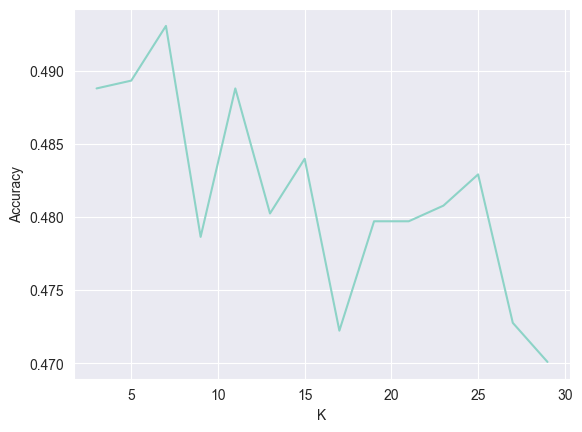

In [353]:
acc = {}
for k in range(3, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc[k] = accuracy_score(y_test, y_pred)
    

plt.plot(range(3,30,2), acc.values())
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


In [354]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.48023504273504275
              precision    recall  f1-score   support

           0       0.31      0.35      0.33       426
           1       0.31      0.18      0.23       330
           2       0.57      0.57      0.57       559
           3       0.58      0.67      0.62       557

    accuracy                           0.48      1872
   macro avg       0.44      0.44      0.44      1872
weighted avg       0.47      0.48      0.47      1872



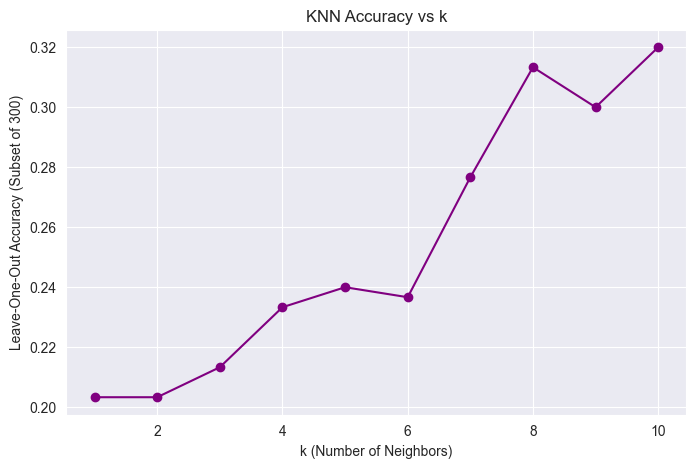

Test Accuracy with k=3: 0.26
Predicted Success Level for new point: 3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [355]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.spatial import distance


np.random.seed(42)  
data = {
    'Category_encoded': np.random.rand(9366),
    'Rating': np.random.rand(9366),
    'Reviews': np.random.rand(9366),
    'Size': np.random.rand(9366),
    'Installs': np.random.rand(9366),
    'Price': np.random.rand(9366),
    'Success_Level_Encoded': np.random.choice([0, 1, 2, 3], 9366, p=[0.2258, 0.1726, 0.2993, 0.3023])
}

df = pd.DataFrame(data)

feature_cols = ['Category_encoded', 'Rating', 'Reviews', 'Size', 'Installs', 'Price']
target_col = 'Success_Level_Encoded'


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols])
y = df[target_col].values


dataset_scaled = np.hstack([X_scaled, y.reshape(-1, 1)])
def knn_predict(x0, dataset, k=3, metric='euclidean'):
    dataset_points = dataset[:, :-1].astype(float)
    test_point = np.array(x0).reshape(1, -1)

    if metric == 'euclidean':
        distances = np.linalg.norm(dataset_points - test_point, axis=1)
    else:
        distances = distance.cdist(test_point, dataset_points, metric=metric).flatten()

    sorted_indices = np.argsort(distances)[:k]
    nearest_labels = dataset[sorted_indices, -1]
    prediction = max(set(nearest_labels), key=nearest_labels.tolist().count)
    return prediction

def knn_accuracy(dataset, k=3, metric='euclidean'):
    correct = 0
    for i in range(len(dataset)):
        test_point = dataset[i]
        train_data = np.delete(dataset, i, axis=0)
        pred = knn_predict(test_point[:-1], train_data, k, metric)
        if pred == test_point[-1]:
            correct += 1
    return correct / len(dataset)


k_values = range(1, 11)
accuracies = [knn_accuracy(dataset_scaled[:300], k) for k in k_values]  

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', color='purple')
plt.title("KNN Accuracy vs k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Leave-One-Out Accuracy (Subset of 300)")
plt.grid(True)
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
dataset_train = np.hstack([X_train, y_train.reshape(-1, 1)])
dataset_test = np.hstack([X_test, y_test.reshape(-1, 1)])

def evaluate_knn(dataset_train, dataset_test, k=3):
    correct = 0
    for point in dataset_test:
        pred = knn_predict(point[:-1], dataset_train, k)
        if pred == point[-1]:
            correct += 1
    return correct / len(dataset_test)

test_accuracy = evaluate_knn(dataset_train, dataset_test, k=3)
print(f"Test Accuracy with k=3: {test_accuracy:.2f}")


new_test_point_raw = [0.7, 0.1, 0.2, 0.3, 0.1, 0.05] 
new_test_point_scaled = scaler.transform([new_test_point_raw])[0]
prediction = knn_predict(new_test_point_scaled, dataset_train, k=3)
print(f"Predicted Success Level for new point: {int(prediction)}")


## Random forest

In [356]:

X = df_tree.drop(columns=['Success_Level_Encoded', 'Success_Level','App','Installs','Last Updated','Current Ver'])  # Features
y = df_tree['Success_Level_Encoded']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [357]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.8643162393162394


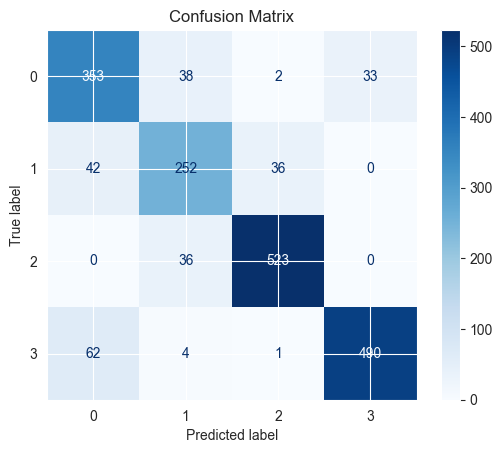

In [358]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


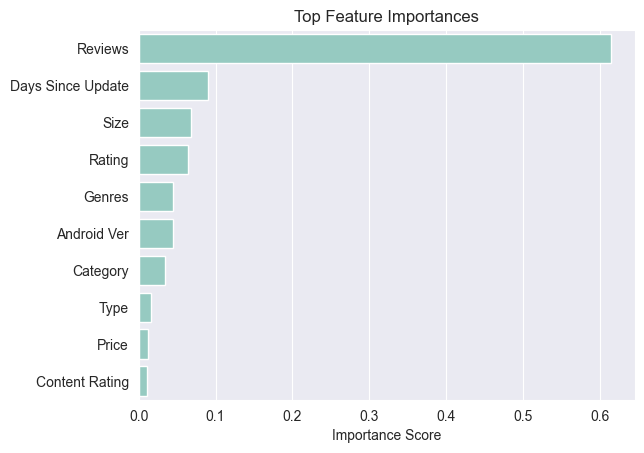

In [359]:


# If you have feature names:
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]
importances = clf.feature_importances_

# Plot top N features
top_n = 10
indices = np.argsort(importances)[::-1][:top_n]
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.show()



 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       426
           1       0.76      0.76      0.76       330
           2       0.93      0.94      0.93       559
           3       0.94      0.88      0.91       557

    accuracy                           0.86      1872
   macro avg       0.85      0.85      0.85      1872
weighted avg       0.87      0.86      0.87      1872



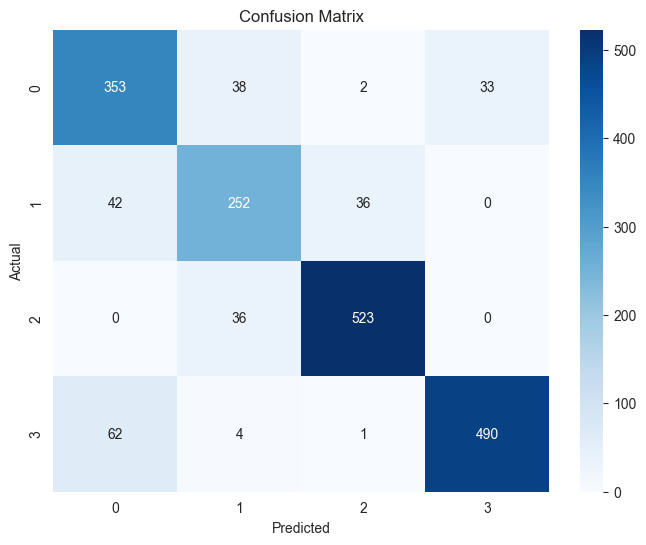

In [360]:

print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [361]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

for name, model in models.items():
    print(f"__________ {name} __________")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error: {mse:.4f}\n")

__________ Linear Regression __________
Mean Squared Error: {mse:.4f}

__________ Decision Tree __________
Mean Squared Error: {mse:.4f}

__________ Random Forest __________
Mean Squared Error: {mse:.4f}

__________ Support Vector Regressor __________
Mean Squared Error: {mse:.4f}

__________ K-Neighbors Regressor __________
Mean Squared Error: {mse:.4f}



In [362]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

predictions = random_forest.predict(X_test)

mse_rf = mean_squared_error(y_test, predictions)
rmse_rf = np.sqrt(mse_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")


residuals = y_test - predictions

Mean Squared Error (MSE): 0.4310
Root Mean Squared Error (RMSE): 0.6565


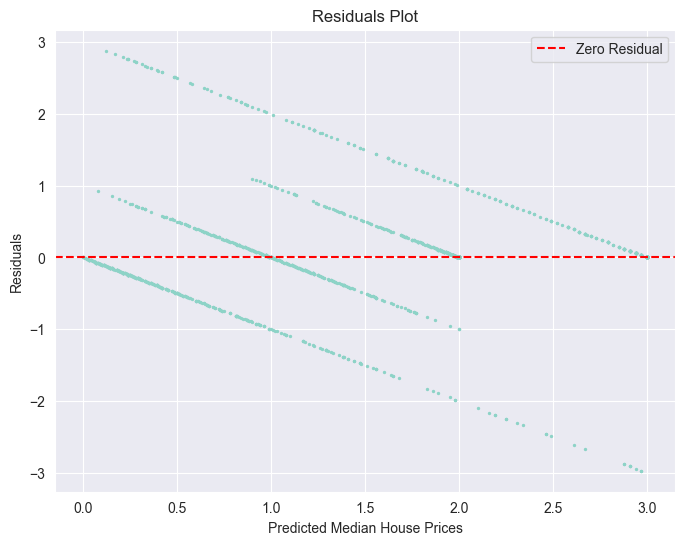

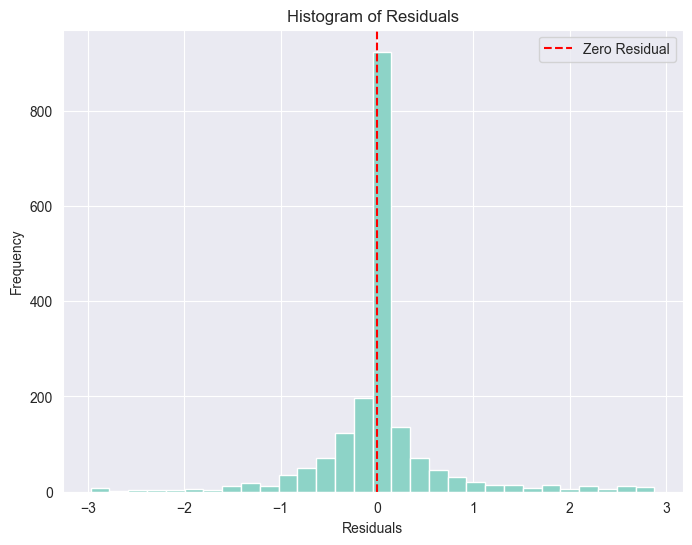

In [363]:
plt.figure(figsize=(8, 6))
plt.scatter(predictions, 
            residuals, 
            s=2)
plt.axhline(y=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Residuals Plot")
plt.xlabel("Predicted Median House Prices")
plt.ylabel("Residuals")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.axvline(x=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Logistic regression 


/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_2895/3269827477.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


🎯 Accuracy (Logistic Regression): 0.5785256410256411

📋 Classification Report:
                 precision    recall  f1-score   support

 Above Average       0.42      0.43      0.43       426
       Average       0.36      0.08      0.14       330
Not Successful       0.51      0.78      0.62       559
    Successful       0.85      0.78      0.81       557

      accuracy                           0.58      1872
     macro avg       0.54      0.52      0.50      1872
  weighted avg       0.57      0.58      0.55      1872



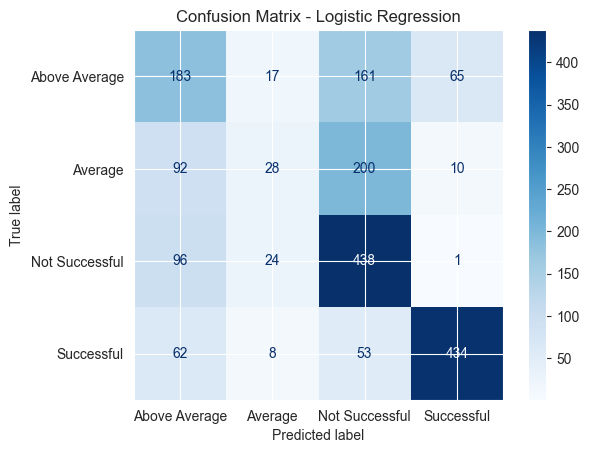

In [364]:

df = df_linear.copy()
df = df.replace({True: 1, False: 0})
df = df.drop(columns=['App', 'Installs', 'Last Updated', 'Current Ver', 'Success_Level_Encoded'])
X = df.drop('Success_Level', axis=1)
y = df['Success_Level']


X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_d)
X_test_scaled = scaler.transform(X_test_d)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train_d)

y_pred_log = log_reg.predict(X_test_scaled)

print("🎯 Accuracy (Logistic Regression):", accuracy_score(y_test_d, y_pred_log))
print("\n📋 Classification Report:\n", classification_report(y_test_d, y_pred_log))


disp = ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test_d, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix - Logistic Regression")
plt.show()

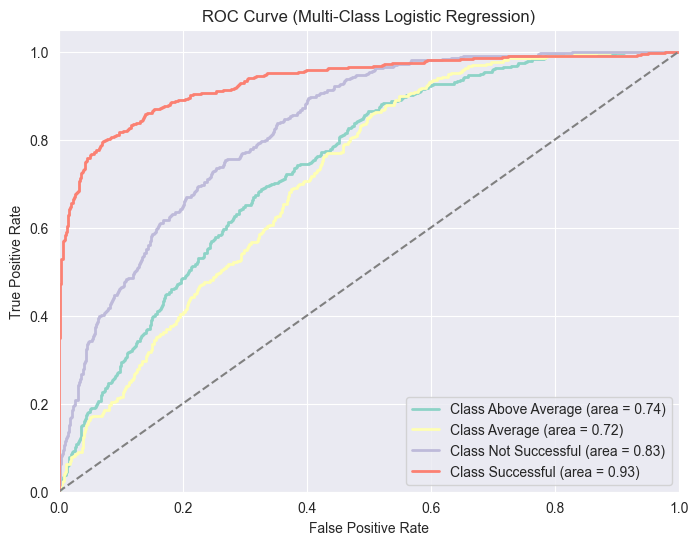

In [365]:



y_test_bin = label_binarize(y_test_d, classes=log_reg.classes_)
y_prob_bin = log_reg.predict_proba(X_test_scaled)


plt.figure(figsize=(8, 6))
for i in range(len(log_reg.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {log_reg.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multi-Class Logistic Regression)')
plt.legend(loc='lower right')
plt.show()


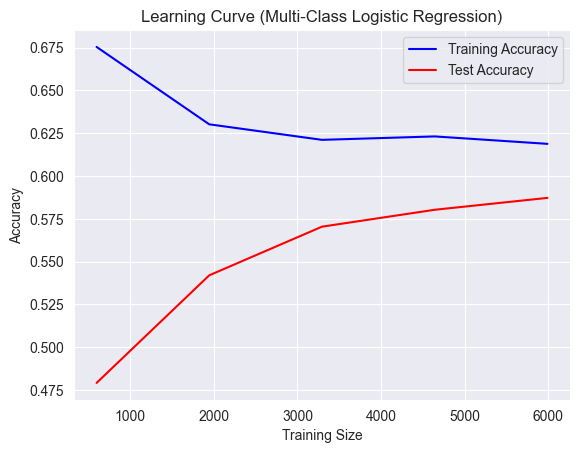

In [366]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(log_reg, X_train_scaled, y_train_d, cv=5, n_jobs=-1)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Test Accuracy', color='red')

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Multi-Class Logistic Regression)')
plt.legend(loc='best')
plt.show()


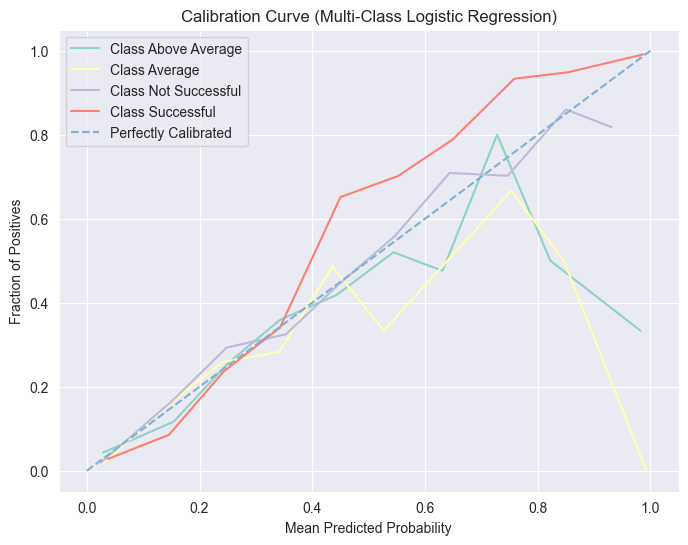

In [367]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 6))
for i in range(len(log_reg.classes_)):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_bin[:, i], y_prob_bin[:, i], n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, label=f'Class {log_reg.classes_[i]}')

plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly Calibrated")
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (Multi-Class Logistic Regression)')
plt.legend()
plt.show()


In [368]:


coef = log_reg.coef_  
feature_names = X.columns


mean_coef = np.mean(np.abs(coef), axis=0)


feature_groups = feature_names.str.extract(r'(^[^_]+)') 
aggregated = pd.DataFrame({'Group': feature_groups[0], 'Importance': mean_coef})
grouped_importance = aggregated.groupby('Group').sum().sort_values(by='Importance', ascending=False).reset_index()


/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_2895/3117084886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_importance.head(20), x='Importance', y='Group', palette='viridis')
/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_2895/3117084886.py:6: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_2895/3117084886.py:6: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-

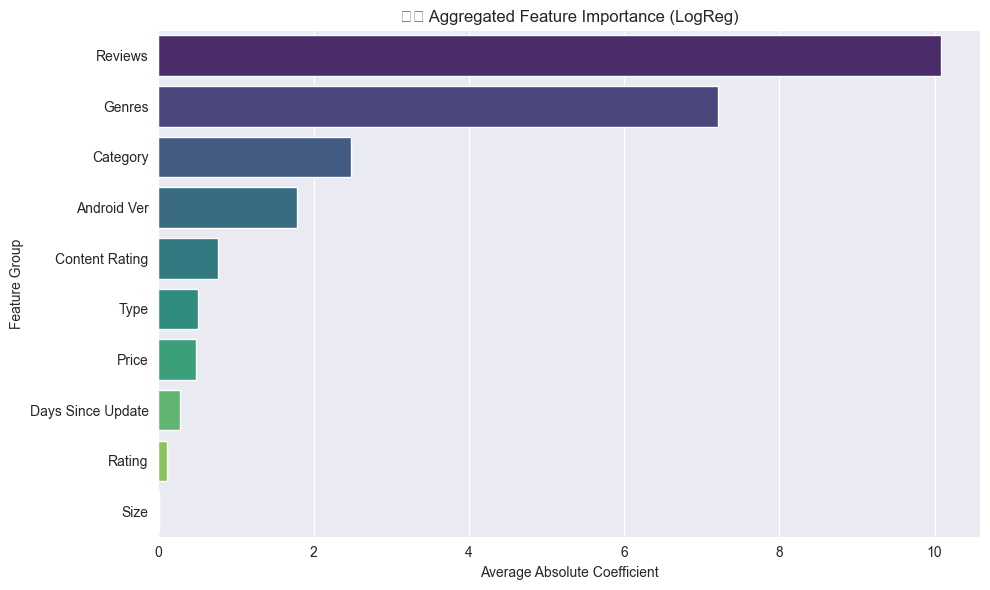

In [369]:


plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_importance.head(20), x='Importance', y='Group', palette='viridis')
plt.title("🏷️ Aggregated Feature Importance (LogReg)")
plt.xlabel("Average Absolute Coefficient")
plt.ylabel("Feature Group")
plt.tight_layout()
plt.show()


### SVM

In [370]:
df_linear.head()

,App,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Days Since Update,Success_Level,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0,2018-01-07,1.0.0,213,Not Successful,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,3.9,967,14.0,500000,0.0,2018-01-15,2.0.0,205,Above Average,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,0.0,2018-08-01,1.2.4,7,Successful,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0,2018-06-08,Varies with device,61,Successful,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0,2018-06-20,1.1,49,Average,...,False,False,False,False,False,False,False,False,False,False


/var/folders/kl/44wqfch571vdfml07x87wnf40000gn/T/ipykernel_2895/2221932991.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


 Accuracy (SVM): 0.5721153846153846

 Classification Report:
                 precision    recall  f1-score   support

 Above Average       0.42      0.43      0.43       426
       Average       0.41      0.08      0.13       330
Not Successful       0.49      0.81      0.61       559
    Successful       0.91      0.73      0.81       557

      accuracy                           0.57      1872
     macro avg       0.56      0.51      0.50      1872
  weighted avg       0.59      0.57      0.54      1872



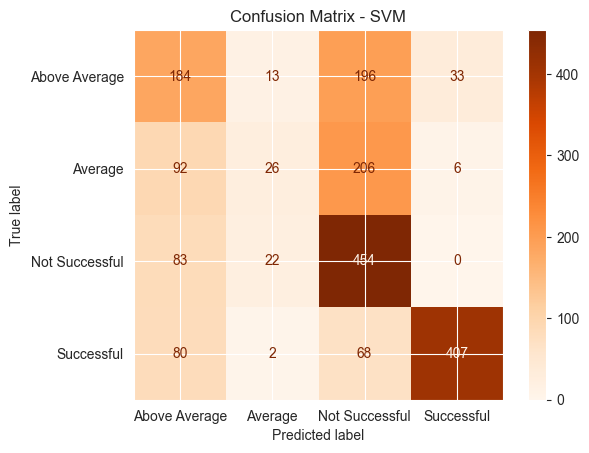

In [371]:


df = df_linear.copy()
df = df.replace({True: 1, False: 0})
df = df.drop(columns=['App', 'Installs', 'Last Updated', 'Current Ver', 'Success_Level_Encoded'])


X = df.drop('Success_Level', axis=1)
y = df['Success_Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_clf = SVC(kernel='linear', decision_function_shape='ovr') 
svm_clf.fit(X_train_scaled, y_train)

y_pred_svm = svm_clf.predict(X_test_scaled)


print(" Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("\n Classification Report:\n", classification_report(y_test, y_pred_svm))


disp = ConfusionMatrixDisplay.from_estimator(svm_clf, X_test_scaled, y_test, cmap=plt.cm.Oranges)
disp.ax_.set_title("Confusion Matrix - SVM")
plt.show()


In [ ]:

param_grid = {'C': [0.01, 0.1,10]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# График
C_values = param_grid['C']
mean_scores = grid_search.cv_results_['mean_test_score']

plt.plot(C_values, mean_scores, marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Cross-validated Accuracy')
plt.title('Accuracy vs C (SVM Linear)')
plt.grid(True)
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

df = df_linear.copy()
df = df.replace({True: 1, False: 0})
df = df.drop(columns=['App', 'Installs', 'Last Updated', 'Current Ver', 'Success_Level_Encoded'])


X = df.drop('Success_Level', axis=1)
y = df['Success_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_cv = SVC(kernel='linear', decision_function_shape='ovr')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_cv, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", np.round(cv_scores, 3))
print("Mean CV Accuracy:", round(np.mean(cv_scores), 4))
print("Standard Deviation:", round(np.std(cv_scores), 4))


svm_cv.fit(X_train_scaled, y_train)
y_pred_svm = svm_cv.predict(X_test_scaled)


print("\n Accuracy (Test):", accuracy_score(y_test, y_pred_svm))
print("\n Classification Report:\n", classification_report(y_test, y_pred_svm))


disp = ConfusionMatrixDisplay.from_estimator(svm_cv, X_test_scaled, y_test, cmap=plt.cm.Oranges)
disp.ax_.set_title("Confusion Matrix - SVM (Test Set)")
plt.show()